# From Ordinary Differential equations to Neural Networks, solving mechanics problems in a new way

# Harmonic Oscillations

Harmonic oscillations are a fundamental concept in physics and engineering that describe the repetitive motion of a system around an equilibrium position. A harmonic oscillator can be found in many physical systems, such as pendulums, springs, and electrical circuits. These systems can be modeled mathematically as a simple harmonic motion, which is characterized by a sinusoidal displacement with a constant amplitude and frequency. The understanding of harmonic oscillations is essential for various fields, including mechanics, electromagnetism, and quantum mechanics. In this context, the study of harmonic oscillations provides insights into the behavior of physical systems and their response to external stimuli, allowing us to design and optimize devices and structures for various applications.

## Harmonic Oscillator: Spring-Block System

$$
\nonumber
F=-\frac{dV(x)}{dx}=-k(x-b).
$$

Our equation of motion is, with the only force given by the one-dimensional spring force and assuming $b=0$, 

$$
ma = m\frac{d^2x}{dt^2}=-kx.
$$

Defining the natural frequency $\omega_0 = \sqrt{k/m}$, we can rewrite this equation as

$$
\frac{d^2x}{dt^2}=-\omega_0^2x.
$$

We call this a natural frequency since it is defined by the constants that describe our system, the spring constant $k$ and the mass $m$ of the object.

The dimensionality of $\omega_0$ is $[T]^{-1}$.

We can as usual split this equation of motion into one equation for the derivative of the velocity and

$$
\frac{dv}{dt}=-\omega_0^2x,
$$

and

$$
\frac{dx}{dt}=v.
$$

The solution to the equations of motion is given by

$$
x(t) = A\cos{(\omega_0 t)}+B\sin{(\omega_0 t)},
$$

where $A$ and $B$ are in general complex constants to be determined by the initial conditions.

Inserting the solution into the equation of motion, we have:

$$
\frac{d^2x}{dt^2}=-\omega_0^2x,
$$

we have

$$
\frac{d^2x}{dt^2} = -A\omega_0^2\cos{(\omega_0 t)}-B\omega_0^2\sin{(\omega_0 t)},
$$

and the right-hand side is just $-\omega_0^2 x(t)$. Thus, inserting the solution into the differential equation shows that we obtain the same original differential equation.



Let us assume that our initial time $t_0=0$s and that the initial position $x(t_0)=x_0$ and that $v_0=0$ (we skip units here).
This gives us

$$
x(t=0) = x_0 =A,
$$

and it leaves $B$ undetermined. Taking the derivative of $x$, we obtain the velocity:

$$
v(t) = -A\omega_0\sin{(\omega_0 t)}+B\omega_0\cos{(\omega_0 t)},
$$

and with

$$
v(t=0) = 0=B,
$$

we see that our solution with these initial conditions becomes

$$
x(t) = x_0\cos{(\omega_0 t)}.
$$

## Energy Conservation

Our energy is given by the kinetic energy and the harmonic oscillator potential energy, that is we have (for a one-dimensional harmonic oscillator potential)

$$
E=\frac{1}{2}mv^2+\frac{1}{2}kx^2.
$$

We assume that we have initial conditions $v_0=0$ (no kinetic energy) and $x(t=0)=x_0$.
With these initial conditions we have

$$
x(t) = x_0\cos{(\omega_0 t)},
$$

and the velocity is given by

$$
v(t) = -x_0\omega_0\sin{(\omega_0 t)},
$$

At a time $t\ne 0$, we have:

$$
E(t)=\frac{1}{2}mv^2+\frac{1}{2}kx^2=\frac{1}{2}mx_0^2\omega_0^2\sin^2{(\omega_0 t)}+\frac{1}{2}kx_0^2\cos^2{(\omega_0 t)},
$$

Recalling that $\omega_0^2=k/m$, we get:

$$
E(t)=\frac{1}{2}kx_0^2\sin^2{(\omega_0 t)}+\frac{1}{2}kx_0^2\cos^2{(\omega_0 t)}=\frac{1}{2}kx_0^2=E_0.
$$

For $x_0 = A$,

$$E_0 = \frac{1}{2}kx_0^2 = \frac{1}{2}kA^2$$

Energy is thus conserved.

## Scaling with $\tau = \omega_0t$

$$
\frac{d^2x}{dt^2}=-\omega_0^2x => \omega_0^2\frac{d^2x}{d\tau^2}=-\omega_0^2x,
$$

Dividing by $\omega_0^2$ on both sides, we get:

$$a = \frac{d^2x}{d\tau^2}= \frac{dv}{d\tau} = -x$$

Now, the dimensionality of both $\frac{dv}{d\tau} = -x$ and $\frac{dx}{d\tau} = v$ is $[L]$ 

The solution to this is given by:

$$x(\tau) = x_0\cos{(\tau)}, v(\tau) = -x_0\sin{(\tau)}$$

## Numerical Solution

### Euler-Cromer

In [27]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

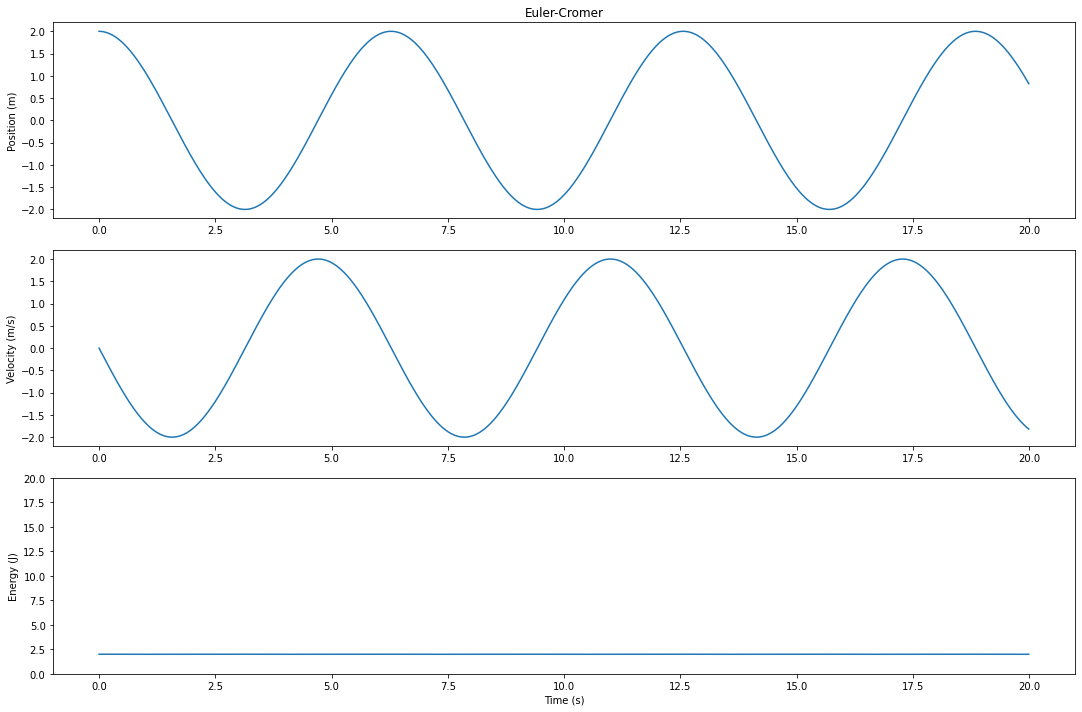

In [28]:
DeltaT = 0.01
#set up arrays 
tfinal = 20 # in seconds
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
x0 = 2
v0 = 0
x[0] = x0
v[0] = v0
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the acceleration
    a =  -x[i]
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
m = 1
k = 1
K = 1/2*m*v**2
V = 1/2*k*x**2
E = K+V
# Plot position, velocity and total energy as function of time    
fig, ax = plt.subplots(3,1)
fig.set_size_inches(15,10)
ax[0].set_title('Euler-Cromer')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[2].plot(t,E)
ax[2].set_ylim([0,20])
ax[2].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
ax[2].set_ylabel('Energy (J)')
fig.tight_layout()
plt.show()

### Velocity-Verlet

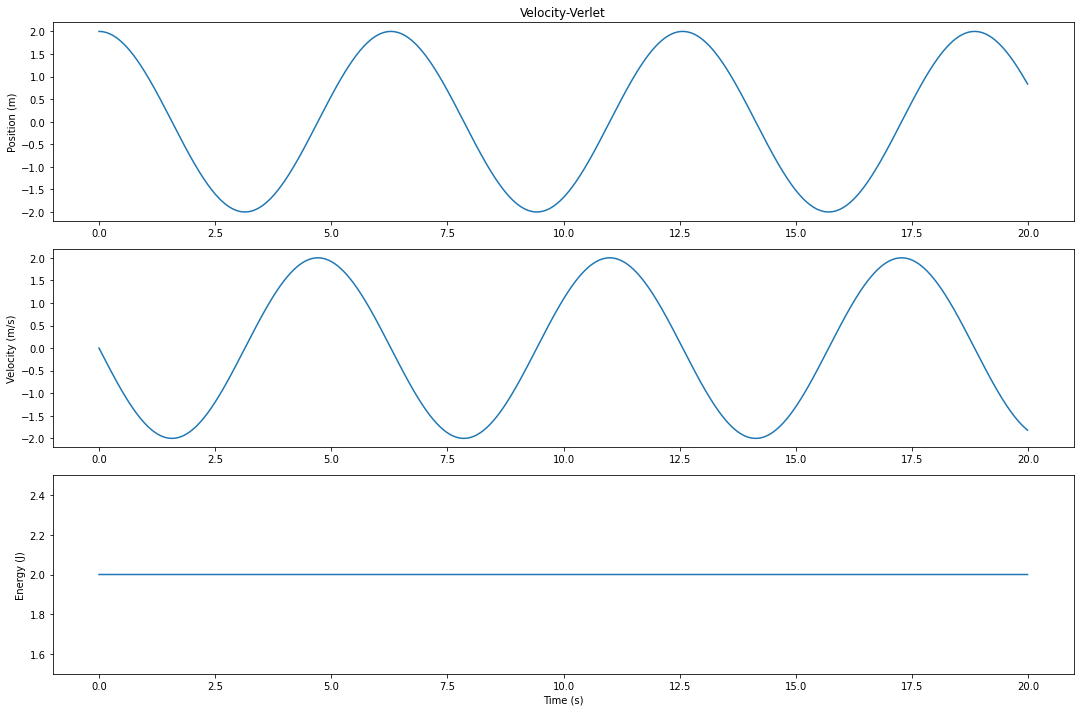

In [29]:
DeltaT = 0.01
#set up arrays 
tfinal = 20
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
x0 = 2
v0 = 0
x[0] = x0
v[0] = v0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up the acceleration
    a =  -x[i]
    # update velocity, time and position using the Velocity-Verlet method
    x[i+1] = x[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -x[i+1]
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
m = 1
k = 1
K = 1/2*m*v**2
V = 1/2*k*x**2
E = K+V
# Plot position, velocity and total energy as function of time    
fig, ax = plt.subplots(3,1)
fig.set_size_inches(15,10)
ax[0].set_title('Velocity-Verlet')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[2].plot(t,E)
ax[2].set_ylim([1.5,2.5])
ax[2].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
ax[2].set_ylabel('Energy (J)')
fig.tight_layout()
plt.show()

The velocity Verlet method is generally considered to be a better method than the Euler-Cromer method when it comes to simulating systems with energy conserving forces.

The Euler-Cromer method is a simple and widely used numerical integration method that updates the position and velocity of a system sequentially, with the velocity being updated using the new position. While this method is easy to implement, it is known to produce errors that accumulate over time, leading to a loss of accuracy and energy conservation in the simulation.

On the other hand, the velocity Verlet method is a more accurate numerical integration method that updates both the position and velocity of a system simultaneously. This method is symplectic, meaning it conserves the energy of the system and is thus particularly useful for simulating systems with energy conserving forces. The velocity Verlet method is also more stable and accurate than the Euler-Cromer method, and it is widely used in molecular dynamics simulations, where energy conservation is critical.

Overall, the velocity Verlet method is considered to be a better choice than the Euler-Cromer method when simulating systems with energy conserving forces, as it provides better accuracy and energy conservation.

## Sliding Block (With Damping Due To Friction)

Now, we change the differential equation we want to solve by adding to our program a first derivative of position (the velocity) which is meant to mimick the role of friction.

$$
m\frac{d^2x(t)}{dt^2} + \beta\frac{dx}{dt}+kx = ma(t)+\beta v(t) +kx(t) = 0.
$$

We divide by $m$ and introduce $\omega_0^2=\sqrt{k/m}$ and obtain

$$
\frac{d^2x}{dt^2} + \frac{\beta}{m}\frac{dx}{dt}+\omega_0^2x(t) =0.
$$

Thereafter, we introduce a dimensionless time $\tau = t\omega_0$ and rewrite our equation as:

$$
\frac{d^2x}{d\tau^2} + \frac{\beta}{m\omega_0}\frac{dx}{d\tau}+x(\tau) =0,
$$

which gives us

$$
\frac{d^2x}{d\tau^2} + \frac{b}{m\omega_0}\frac{dx}{d\tau}+x(\tau) =0.
$$

We then define $\gamma = b/(2m\omega_0)$ and rewrite our equation as:

$$
\frac{d^2x}{d\tau^2} + 2\gamma\frac{dx}{d\tau}+x(\tau) =0.
$$

This gives us:

$$\frac{d^2x}{d\tau^2} = - 2\gamma v(t)-x(\tau) \text{ where } v(t) = \frac{dx}{d\tau}$$

Again, the dimensionality of both $\frac{dv}{d\tau} = -2\gamma v(t)-x(\tau)$ and $\frac{dx}{d\tau} = v(t)$ is $[L]$ 

## Numerical Solutions of Damped Oscillations

With $k=1, m=1$, it means $\omega_0 = 1$. Thus, $\gamma$ can be chosen accordingly for the three cases: underdamping, critical damping and overdamping.

### (i) Underdamping

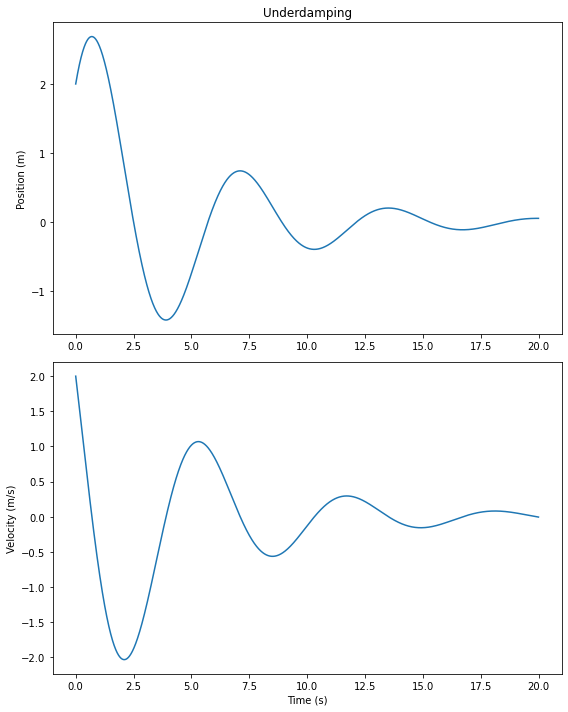

In [30]:
DeltaT = 0.01
#set up arrays 
tfinal = 20 # in seconds
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
x0 = 2
v0 = 2
x[0] = x0
v[0] = v0
gamma = 0.2
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the acceleration
    a =  -2*gamma*v[i]-x[i]
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
m = 1
k = 1
# Plot position and velocity as function of time    
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].set_title('Underdamping')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
fig.tight_layout()
plt.show()

### (ii) Critical Damping

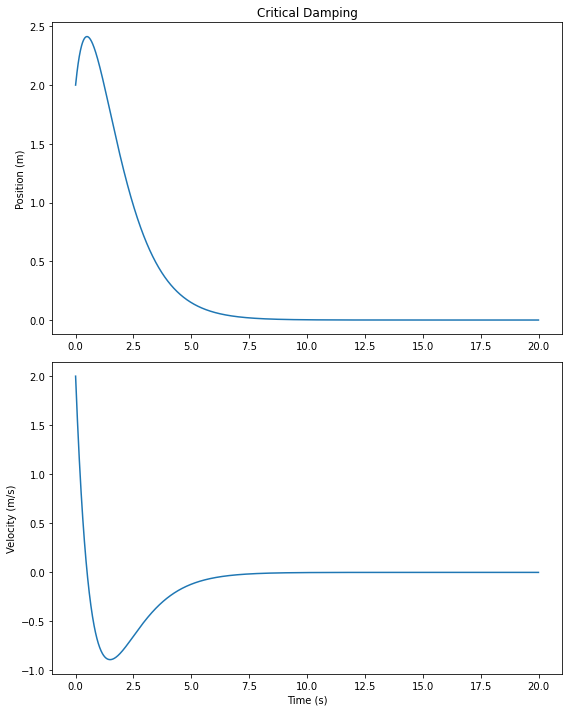

In [31]:
DeltaT = 0.01
#set up arrays 
tfinal = 20 # in seconds
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
x0 = 2
v0 = 2
x[0] = x0
v[0] = v0
gamma = 1
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the acceleration
    a =  -2*gamma*v[i]-x[i]
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
m = 1
k = 1
# Plot position and velocity as function of time    
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].set_title('Critical Damping')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
fig.tight_layout()
plt.show()

### (iii) Overdamping

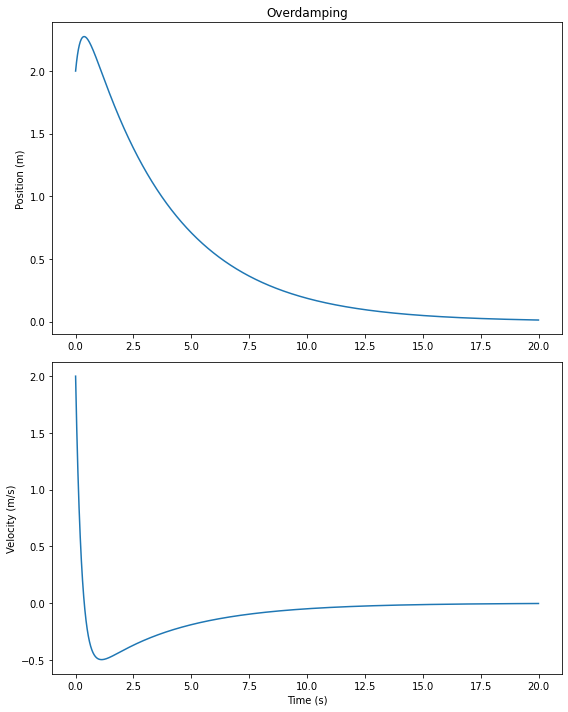

In [32]:
DeltaT = 0.01
#set up arrays 
tfinal = 20 # in seconds
n = ceil(tfinal/DeltaT)
# set up arrays for t, a, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as compact 2-dimensional arrays
x0 = 2
v0 = 2
x[0] = x0
v[0] = v0
gamma = 2
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the acceleration
    a =  -2*gamma*v[i]-x[i]
    # update velocity, time and position using Euler's forward method
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
m = 1
k = 1
# Plot position and velocity as function of time    
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].set_title('Overdamping')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
fig.tight_layout()
plt.show()

Underdamping occurs when the damping force is relatively weak, and the system oscillates with decreasing amplitude but still exhibits oscillatory behavior. The system takes longer to come to rest than it would in the absence of damping. In this case, 𝛾 is less than the critical damping value, which is the minimum amount of damping required to bring the system to rest as quickly as possible.

Critical damping occurs when the damping force is just strong enough to bring the system to rest in the shortest possible time without oscillating. In this case, 𝛾 is equal to the critical damping value, and the system returns to its equilibrium position as quickly as possible without oscillating.

Overdamping occurs when the damping force is very strong, and the system takes an extended time to return to its equilibrium position without oscillating. In this case, 𝛾 is greater than the critical damping value, and the system's motion is dominated by the damping force rather than the restoring force.

The behavior of a damped oscillator depends on the relative strengths of the damping force and the restoring force. Understanding the different types of damping is essential in designing and analyzing mechanical and electrical systems that exhibit oscillatory behavior in the presence of damping. Numerical solutions of damped oscillations can be used to model and analyze these systems and predict their behavior under various conditions.

## Driven Oscillations

Assume that our external driving force is given by

$$
F_{\mathrm{ext}}(t) = F_0\cos{(\omega t)},
$$

Introducing the external force into the differential equation and dividing by $m$ and introducing $\omega_0^2=\sqrt{k/m}$ we have

$$
\frac{d^2x}{dt^2} + \frac{b}{m}\frac{dx}{dt}+\omega_0^2x(t) =\frac{F_0}{m}\cos{(\omega t)},
$$

Thereafter we introduce a dimensionless time $\tau = t\omega_0$
and a dimensionless frequency $\tilde{\omega}=\omega/\omega_0$. We have then

$$
\frac{d^2x}{d\tau^2} + \frac{b}{m\omega_0}\frac{dx}{d\tau}+x(\tau) =\frac{F_0}{m\omega_0^2}\cos{(\tilde{\omega}\tau)},
$$

Introducing a new amplitude $\tilde{F} =F_0/(m\omega_0^2)$ (check dimensionality again) we have

$$
\frac{d^2x}{d\tau^2} + \frac{b}{m\omega_0}\frac{dx}{d\tau}+x(\tau) =\tilde{F}\cos{(\tilde{\omega}\tau)}.
$$

Our final step, as we did in the case of various types of damping, is
to define $\gamma = b/(2m\omega_0)$ and rewrite our equations as

$$
\frac{d^2x}{d\tau^2} + 2\gamma\frac{dx}{d\tau}+x(\tau) =\tilde{F}\cos{(\tilde{\omega}\tau)}.
$$

This gives us:

$$\frac{d^2x}{d\tau^2} = - 2\gamma v(t)-x(\tau)+\tilde{F}\cos{(\tilde{\omega}\tau)} \text{ where } v(t) = \frac{dx}{d\tau}$$

## Numerical Solutions of Driven Oscillations

### Euler-Cromer

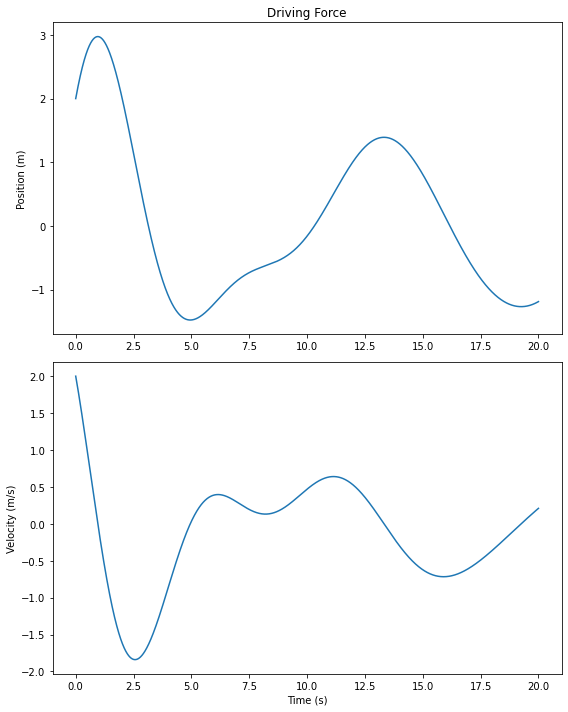

In [33]:
DeltaT = 0.001
#set up arrays 
tfinal = 20 # in dimensionless time
n = ceil(tfinal/DeltaT)
# set up arrays for t, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as one-dimensional arrays of time
x0 = 2
v0 = 2
x[0] = x0
v[0] = v0
gamma = 0.2
Omegatilde = 0.5
Ftilde = 1.0
# Start integrating using Euler-Cromer's method
for i in range(n-1):
    # Set up the acceleration
    a =  -2*gamma*v[i]-x[i]+Ftilde*cos(t[i]*Omegatilde)
    # update velocity, time and position
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
# Plot position and velocity as function of time    
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].set_title('Driving Force')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
fig.tight_layout()
plt.show()

### Runge-Kutta (Fourth Order)

In [34]:
def SpringForce(v,x,t):
#   note here that we have divided by mass and we return the acceleration
    return  -2*gamma*v-x+Ftilde*cos(t*Omegatilde)

In [35]:
def RK4(v,x,t,n,Force):
    for i in range(n-1):
# Setting up k1
        k1x = DeltaT*v[i]
        k1v = DeltaT*Force(v[i],x[i],t[i])
# Setting up k2
        vv = v[i]+k1v*0.5
        xx = x[i]+k1x*0.5
        k2x = DeltaT*vv
        k2v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k3
        vv = v[i]+k2v*0.5
        xx = x[i]+k2x*0.5
        k3x = DeltaT*vv
        k3v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k4
        vv = v[i]+k3v
        xx = x[i]+k3x
        k4x = DeltaT*vv
        k4v = DeltaT*Force(vv,xx,t[i]+DeltaT)
# Final result
        x[i+1] = x[i]+(k1x+2*k2x+2*k3x+k4x)/6.
        v[i+1] = v[i]+(k1v+2*k2v+2*k3v+k4v)/6.
        t[i+1] = t[i] + DeltaT

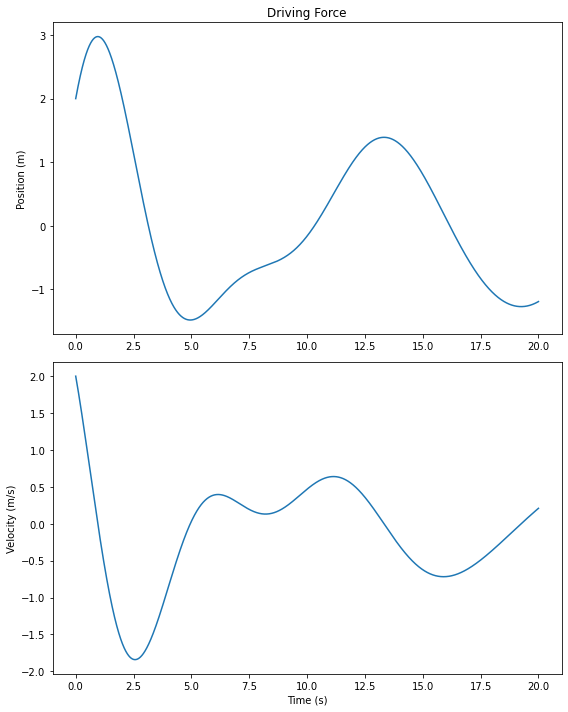

In [36]:
DeltaT = 0.001
#set up arrays 
tfinal = 20 # in dimensionless time
n = ceil(tfinal/DeltaT)
# set up arrays for t, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions (can change to more than one dim)
x0 = 2 
v0 = 2
x[0] = x0
v[0] = v0
gamma = 0.2
Omegatilde = 0.5
Ftilde = 1.0
# Start integrating using the RK4 method
# Note that we define the force function as a SpringForce
RK4(v,x,t,n,SpringForce)

# Plot position and velocity as function of time    
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].set_title('Driving Force')
ax[0].plot(t,x)
ax[1].plot(t,v)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[1].set_ylabel('Velocity (m/s)')
fig.tight_layout()
plt.show()

Numerical solutions of driven oscillations involve using computational methods to solve differential equations that describe the behavior of systems that are subject to an external driving force. The differential equations can be solved numerically using various methods, including the Euler-Cromer and the Runge-Kutta fourth-order methods.

The Euler-Cromer method is a straightforward and easy-to-implement numerical integration method that is commonly used to solve differential equations in physics and engineering. However, it can introduce errors that accumulate over time, leading to a loss of accuracy in the simulation. This method is also not very efficient for complex systems or systems with rapidly varying driving forces.

In contrast, the Runge-Kutta fourth-order method is a more accurate and reliable numerical integration method that is widely used in simulations of driven oscillations. This method uses a set of equations to calculate the values of the system variables at each time step, resulting in more accurate predictions of the system's behavior. Additionally, the Runge-Kutta fourth-order method is more efficient for systems with rapidly varying driving forces, allowing for faster and more accurate simulations.

Overall, the Runge-Kutta fourth-order method is considered to be a better choice than the Euler-Cromer method when simulating driven oscillations due to its higher accuracy, reliability, and efficiency. This method can provide more accurate predictions of the system's behavior under different driving conditions, helping engineers and physicists design and optimize systems that exhibit driven oscillations.

## Neural Networks

Neural networks have become increasingly popular in recent years for modeling and predicting the behavior of physical systems, including damped and driven oscillations. These systems can exhibit complex and nonlinear behavior that can be challenging to understand and predict using traditional mathematical models.

The code provided above demonstrates the use of a neural network to study a damped oscillation system with an external driving force. The system is modeled using a differential equation that describes the motion of a spring-mass system subject to an external driving force. The differential equation is solved using the scipy.integrate.solve_ivp function to generate training and validation data for the neural network.

The neural network is implemented using the TensorFlow library in Python. The architecture consists of a Long Short-Term Memory (LSTM) layer followed by two fully connected layers with dropout regularization to prevent overfitting. The network is trained using the mean squared error loss function and the Adam optimizer.

The code includes early stopping as a regularization technique to prevent overfitting of the model to the training data. The validation loss is monitored during training, and if it fails to improve for a specified number of epochs, the training is stopped and the weights of the best-performing model are restored.

Overall, the use of neural networks for studying damped and driven oscillations allows for the prediction of complex and nonlinear behavior, which can be difficult to achieve with traditional mathematical models. The code provided serves as an example of how neural networks can be used to model and predict the behavior of physical systems, providing insights into their behavior under different conditions.

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [38]:
learning_rate = 0.001
epochs = 1000
hidden_layer_size = 64
l2_regularization = 1e-4
dropout_rate = 0.2

In [39]:
model = Sequential([
    LSTM(hidden_layer_size, activation='tanh', input_shape=(1, 3), kernel_regularizer=l2(l2_regularization)),
    Dropout(dropout_rate),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(l2_regularization)),
    Dropout(dropout_rate),
    Dense(2)
])

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

In [40]:
def SpringForce(t, y, gamma, Ftilde, Omegatilde):
    x, v = y
    a = -2*gamma*v-x+Ftilde*cos(t*Omegatilde)
    return [v, a]

In [41]:
gamma = 0.2
Ftilde = 1.0
Omegatilde = 0.5

t_span = (0, 20)
t_eval = np.linspace(*t_span, num=1000)
initial_conditions = [2, 2]

solution = solve_ivp(SpringForce, t_span, initial_conditions, args=(gamma, Ftilde, Omegatilde), t_eval=t_eval, method='RK45')
t_train = solution.t
y_train = solution.y.T

In [42]:
validation_split = 0.2
split_index = int((1 - validation_split) * len(t_train))

t_train, t_val = t_train[:split_index], t_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

In [43]:
input_train = np.column_stack((t_train, y_train))
input_train = input_train[:, np.newaxis, :]

input_val = np.column_stack((t_val, y_val))
input_val = input_val[:, np.newaxis, :]

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model.fit(input_train, y_train, epochs=epochs, verbose=1, validation_data=(input_val, y_val), callbacks=[early_stopping])

Epoch 1/1000
25/25 [==============================] - 5s 27ms/step - loss: 0.9932 - val_loss: 0.9847
Epoch 2/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.6206 - val_loss: 1.1054
Epoch 3/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2845 - val_loss: 0.6862
Epoch 4/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1508 - val_loss: 0.5876
Epoch 5/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0904 - val_loss: 0.3317
Epoch 6/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0776 - val_loss: 0.2523
Epoch 7/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0681 - val_loss: 0.2011
Epoch 8/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0594 - val_loss: 0.1479
Epoch 9/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0564 - val_loss: 0.1409
Epoch 10/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0546 - val_loss: 0.153

7/7 [==============================] - 0s 3ms/step


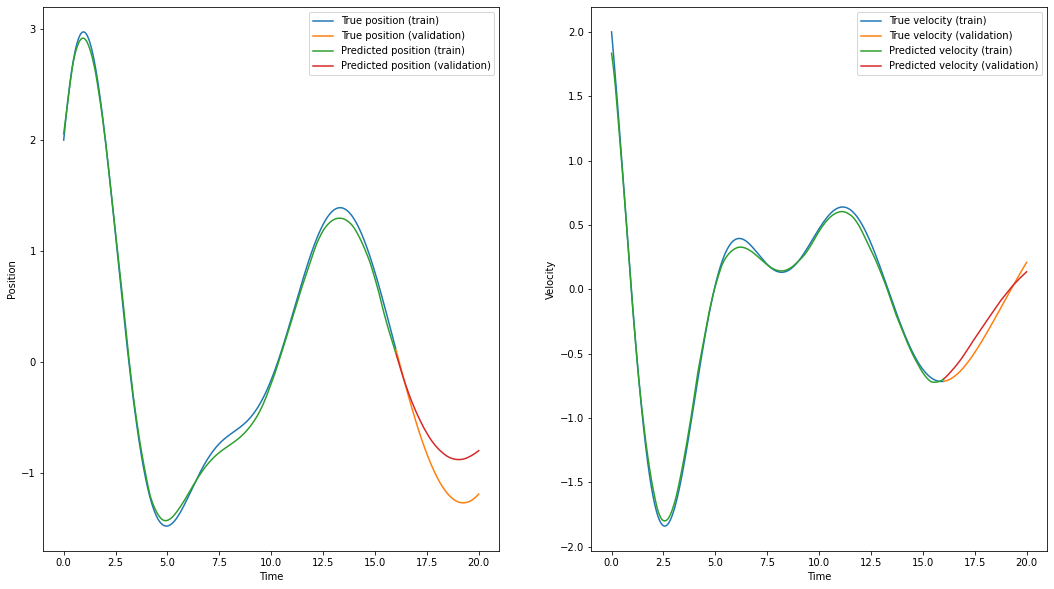

In [45]:
y_pred_train = model.predict(input_train)
y_pred_val = model.predict(input_val)

plt.figure(figsize=(18,10))

plt.subplot(1, 2, 1)
plt.plot(t_train, y_train[:, 0], label='True position (train)')
plt.plot(t_val, y_val[:, 0], label='True position (validation)')
plt.plot(t_train, y_pred_train[:, 0], label='Predicted position (train)')
plt.plot(t_val, y_pred_val[:, 0], label='Predicted position (validation)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_train, y_train[:, 1], label='True velocity (train)')
plt.plot(t_val, y_val[:, 1], label='True velocity (validation)')
plt.plot(t_train, y_pred_train[:, 1], label='Predicted velocity (train)')
plt.plot(t_val, y_pred_val[:, 1], label='Predicted velocity (validation)')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()

plt.show()

### Test Model on Other Initial Conditions

#### Predicting Critical Damping

In [46]:
gamma = 1
Ftilde = 0
Omegatilde = 1

t_span = (0, 20)
t_eval = np.linspace(*t_span, num=1000)
initial_conditions = [2, 2]

solution = solve_ivp(SpringForce, t_span, initial_conditions, args=(gamma, Ftilde, Omegatilde), t_eval=t_eval, method='RK45')
t_train = solution.t
y_train = solution.y.T

In [47]:
validation_split = 0.2
split_index = int((1 - validation_split) * len(t_train))

t_train, t_val = t_train[:split_index], t_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

In [48]:
input_train = np.column_stack((t_train, y_train))
input_train = input_train[:, np.newaxis, :]

input_val = np.column_stack((t_val, y_val))
input_val = input_val[:, np.newaxis, :]

7/7 [==============================] - 0s 3ms/step


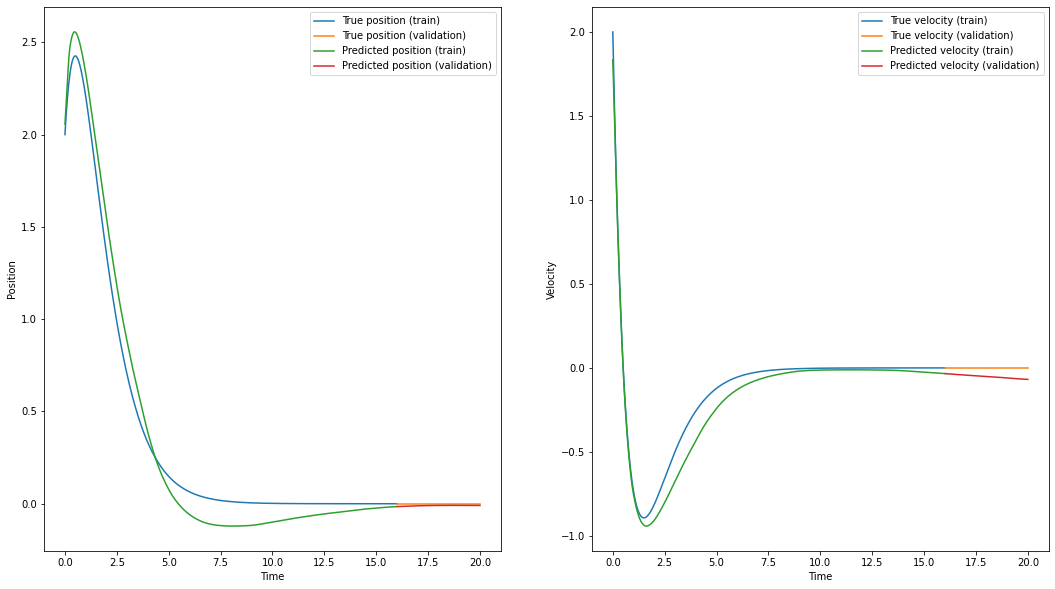

In [49]:
y_pred_train = model.predict(input_train)
y_pred_val = model.predict(input_val)

plt.figure(figsize=(18,10))

plt.subplot(1, 2, 1)
plt.plot(t_train, y_train[:, 0], label='True position (train)')
plt.plot(t_val, y_val[:, 0], label='True position (validation)')
plt.plot(t_train, y_pred_train[:, 0], label='Predicted position (train)')
plt.plot(t_val, y_pred_val[:, 0], label='Predicted position (validation)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_train, y_train[:, 1], label='True velocity (train)')
plt.plot(t_val, y_val[:, 1], label='True velocity (validation)')
plt.plot(t_train, y_pred_train[:, 1], label='Predicted velocity (train)')
plt.plot(t_val, y_pred_val[:, 1], label='Predicted velocity (validation)')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()

plt.show()

#### Predicting Underdamping

In [50]:
gamma = 0.2
Ftilde = 0
Omegatilde = 0.5

t_span = (0, 20)
t_eval = np.linspace(*t_span, num=1000)
initial_conditions = [2, 2]

solution = solve_ivp(SpringForce, t_span, initial_conditions, args=(gamma, Ftilde, Omegatilde), t_eval=t_eval, method='RK45')
t_train = solution.t
y_train = solution.y.T

In [51]:
validation_split = 0.2
split_index = int((1 - validation_split) * len(t_train))

t_train, t_val = t_train[:split_index], t_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

In [52]:
input_train = np.column_stack((t_train, y_train))
input_train = input_train[:, np.newaxis, :]

input_val = np.column_stack((t_val, y_val))
input_val = input_val[:, np.newaxis, :]

7/7 [==============================] - 0s 3ms/step


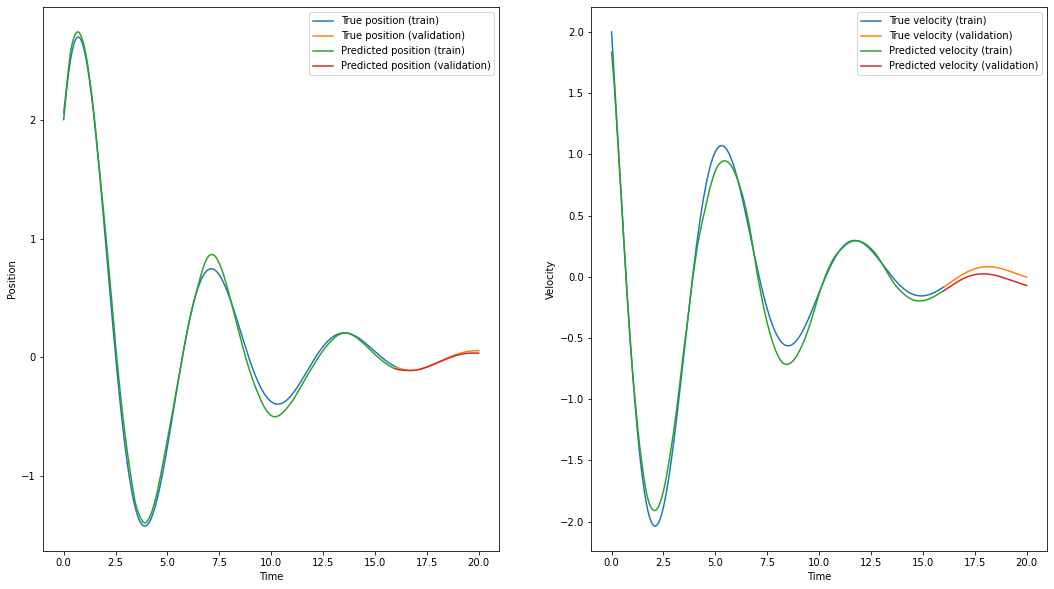

In [53]:
y_pred_train = model.predict(input_train)
y_pred_val = model.predict(input_val)

plt.figure(figsize=(18,10))

plt.subplot(1, 2, 1)
plt.plot(t_train, y_train[:, 0], label='True position (train)')
plt.plot(t_val, y_val[:, 0], label='True position (validation)')
plt.plot(t_train, y_pred_train[:, 0], label='Predicted position (train)')
plt.plot(t_val, y_pred_val[:, 0], label='Predicted position (validation)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_train, y_train[:, 1], label='True velocity (train)')
plt.plot(t_val, y_val[:, 1], label='True velocity (validation)')
plt.plot(t_train, y_pred_train[:, 1], label='Predicted velocity (train)')
plt.plot(t_val, y_pred_val[:, 1], label='Predicted velocity (validation)')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()

plt.show()

It is common for neural networks to achieve a high degree of accuracy when modeling physical systems, but it is rare for them to be 100% accurate. The neural network in the provided code was trained on a specific driven oscillation system and later tested on critical and underdamping systems. While the model was able to predict the behavior of the systems with reasonable accuracy, it was not 100% accurate.

There are several reasons why a neural network may not achieve 100% accuracy when modeling physical systems. One reason is that physical systems can exhibit complex and nonlinear behavior, and it may be challenging to capture all the details of the system in the neural network. Another reason is that the neural network is only as accurate as the data it is trained on. If the training data does not represent the system's behavior accurately, the neural network's performance may suffer.

In the case of the provided code, the neural network was trained on a specific driven oscillation system, and its accuracy was later tested on critical and underdamping systems. While the network was able to model the behavior of these systems, it was not 100% accurate, possibly due to the differences in the behavior of these systems compared to the driven oscillation system used for training. Additionally, the neural network's accuracy may be affected by the specific hyperparameters chosen, such as the number of hidden layers and the regularization techniques used.

Overall, while the neural network in the provided code was not 100% accurate in modeling the critical and underdamping systems, it still provided a useful tool for predicting their behavior. With further fine-tuning of the model's hyperparameters and additional training data, the accuracy of the neural network could potentially be improved.

-----

Written by Agrim Gupta, Astrophysics & Data Science Major, Michigan State University